# First lecture: basics and review

I am assuming you have already been exposed to the basics from the theory lectures. Here I am just going for a quick hands-on recap.

### Installing the relevant software

First we will install Qiskit with its visualization tools.
On our local environment Qiskit should already be installed, though I am not sure whether it was installed with visualization tools. On colab we need to install it.
---



In [ ]:
!pip install 'qiskit[visualization]'

### Qiskit version

Software tools change quickly. It is always a good idea to know which version we are using. Note that ChatGPT and Gemini were trained on older versions and are often wrong. Find the qiskit release history [here](https://github.com/qiskit/qiskit/releases).

In [1]:
import qiskit
print(qiskit.__version__)

1.2.4


### Basic 1-qubit circuit

In [4]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit.visualization import plot_histogram

# create a one qubit circuit

#initialize (the qubit starts in state |0>)
qc = QuantumCircuit(1)

# show the state vector before applying Hadamard
print("Before Hadamard")
statevector = Statevector(qc)
print(statevector)

# apply a Hadamard gate to our qubit
qc.h(0)

# show the state vector after applying Hadamard
print("After Hadamard")
statevector = Statevector(qc)
print(statevector)

Before Hadamard
Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
After Hadamard
Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


Note that in general we cannot observe the state vector non-destructively.
In real applications we will have to measure the state, making it collapse onto a classical bit value.

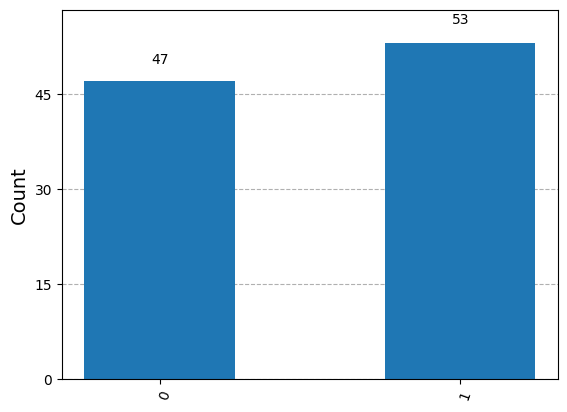

In [8]:
# create a one qubit circuit

#initialize (the qubit starts in state |0>)
qc = QuantumCircuit(1)
# apply a Hadamard gate to our qubit
qc.h(0)
# measure the qubit
qc.measure_all()

# Classically simulate our quantum circuit using Sampler
# collect 1000 shots from the circuit

result = Sampler().run([qc,], shots=100).result()[0] #note the [0]
co = result.data.meas.get_counts()

plot_histogram(co)

Did you expect this result?

$$
\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}
\mathbf{H} \ket{0} = \frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1}
$$

Probability is the (modulus) square of the amplitude, so the probability of observing 0 is $p(0) = 1/2$. This is like flipping an unbiased coin.

We do not necessarily observe the result $0$ exactly $500$ times. We may end up observing it $485$ times, for instance.

Over independent reruns of the experiment we expect the distribution to be binomial.
For a large number of runs this is approximated by a Gaussian with mean $500$ with a standard deviation of $\sqrt{500} \approx 22$. Events three standard deviations or more away from the mean are rare (fraction of a percent probability).

## Exercise 0
**Rerun Sampler() a few times. Observe the variability of the result. Change the number of shots. Do the results deviate from $1/2$ - $1/2$ more when the number of shots is smaller?**

### Bloch sphere

Let's take a look at the representation of our state in terms of the Bloch sphere. First we will need a function to compute the Bloch angles given the complex amplitudes.

In [9]:
import numpy as np

def bloch_angles(alpha, beta):
  """Computes the angles on the Bloch sphere for a given state.

  Args:
    alpha: The complex amplitude for the |0> state.
    beta: The complex amplitude for the |1> state.

  Returns:
    A tuple containing the theta and phi angles in radians.
  """

  # Normalize the amplitudes (they should be; but never trust your users)
  norm = np.sqrt(np.abs(alpha)**2 + np.abs(beta)**2)
  alpha /= norm
  beta /= norm

  # Compute the angles
  theta = 2 * np.arccos(np.abs(alpha))
  phi = np.angle(beta) - np.angle(alpha)

  return theta, phi

(np.float64(0.0), np.float64(0.0))


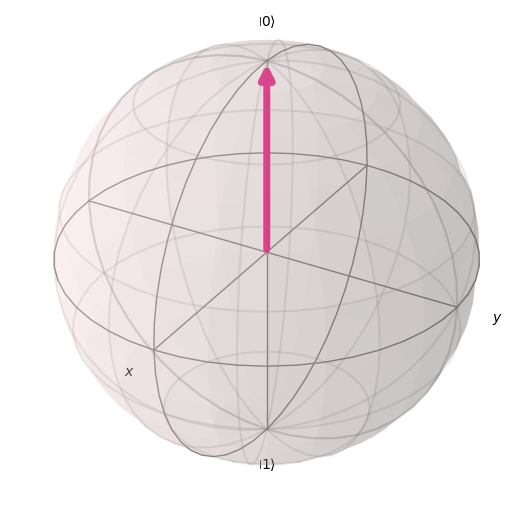

In [13]:
from qiskit.visualization import plot_bloch_vector

print(bloch_angles(1.0, 0.0))

plot_bloch_vector([1,0,0],coord_type='spherical')

## Exercise 1:

**Use *plot_bloch_vector* to plot different vectors on the Bloch sphere.
Try to plot one at 45 degrees with respect to the vertical axis, one on the equatorial plane, and one pointing downwards. Understand that the closer to $\ket{0}$ a state is on the Bloch sphere, the more likely it is to be observed as $\ket{0}$ (why?). Make sure it is clear to you that $\ket{0}$ and $\ket{1}$ are *orthogonal* states, even though the representation on the Bloch sphere can be misinterpreted as meaning that $\ket{1} = -\ket{0}$. THAT IS NOT THE CASE. Make sure you understand this.**

Moving on, given a state we will calculate its Bloch angles using the bloch_angles function and visualize them using qiskit's visualization tools.



Theta:  1.5707963267948966
Phi:  0.0


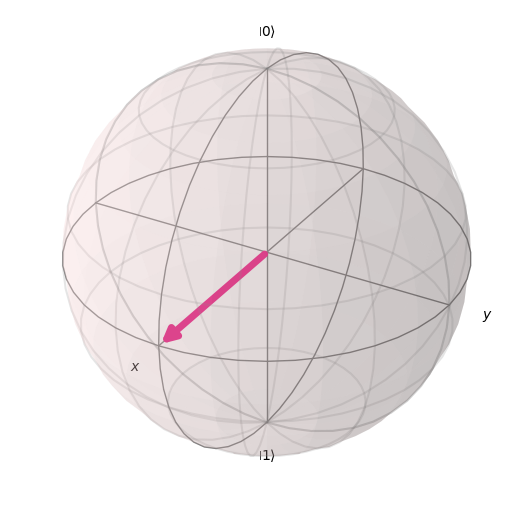

In [ ]:
from qiskit.visualization import plot_bloch_vector

qc = QuantumCircuit(1)
qc.h(0)
statevector = Statevector(qc)

theta, phi = bloch_angles(statevector.data[0], statevector.data[1])
print("Theta: ", theta)
print("Phi: ", phi)

plot_bloch_vector([1,theta,phi], coord_type="spherical") #use [r, theta, phi]

### Bloch sphere theory refresher

$$
\ket{\psi} = a \ket{0} + b \ket{1}
$$

$a$ and $b$ are **complex numbers**, corresponding to two reals. Thus they can be represented in polar notation as well as in cartesian notation.

Cartesian notation:
$$
a = x + i b
$$

Polar notation:
$$
a = r e^{i \xi}
$$

Relation between the two forms:
$$
x = r \cos{\xi}
$$
$$
y = r \sin{\xi}
$$

Imagine them as unit vectors in a plane, the complex plane.

We can compute their modulus:
$$
|a| = r = x^2 + y^2
$$

**Two** complex numbers correspond to **four** degrees of freedom. Why is it that we end up with **two** real numbers as the angles of the Bloch sphere? Where did the **remaining two** degrees of freedom disappear?

**Answer:** we can ignore the global phase of any state (minus one degree of freedom) and we enforce normalization (minus one degree of freedom).

In practice:

$$
\ket{\psi} = a \ket{0} + b \ket{1} = \frac{a}{|a|} |a| \ket{0} + b \ket{1}
$$

where we isolated the phase of $a$:
$$
\frac{a}{|a|} = e^{i \xi}
$$

we proceed similarly for $b$:

$$
\ket{\psi} = a \ket{0} + b \ket{1} = \frac{a}{|a|} |a| \ket{0} + \frac{b}{|b|} |b| \ket{1} = e^{i \xi} |a| \ket{0} + e^{i \kappa} |b| \ket{1}
$$

where again we rewrite
$$
\frac{b}{|b|} = e^{i \kappa}
$$
by introducing the phase of $b$.

Now **the global phase does not matter** so

$$
\ket{\psi} = e^{i \xi} \left( |a| \ket{0} + e^{i (\kappa - \xi)} |b| \ket{1} \right)  = |a| \ket{0} + e^{i (\kappa - \xi)} |b| \ket{1}
$$

Due to the normalization
$$
|a|^2 + |b|^2 = 1
$$
so we can rewrite this as the cosine and sine of some angle:

$$
\ket{\psi} = \cos{\mu} \ket{0} + e^{i (\kappa - \xi)} \sin{\mu} \ket{1}
$$

We now rename our angles as follows (we can always do that)
$$
\mu = \frac{1}{2} \theta
$$
and
$$
\kappa - \xi = \phi
$$

so at the end we get

$$
\ket{\psi} = \cos{\theta/2} \ket{0} + e^{i \phi} \sin{\theta/2} \ket{1}
$$

Note that $\mu$, like $\phi$ varied between $0$ and $2 \pi$. But $\theta$ is half of $\mu$ so it varies between $0$ and $\pi$. We can then represent our state as a point on the surface of a sphere using these two coordinates $\theta$ and $\phi$.

Remember (Born rule) that the probability of being observed as $\ket{0}$, that is of collapsing on the classical bit $0$, is

$$
P(0) = \left | \bra{0}\ket{\psi} \right |^2 = \cos^2{\theta/2}
$$

## Exercise 2
**What is the probability of collapsing on $\ket{1}$? Does it depend on $\phi$?**



### Hadamard is its own inverse: sanity check

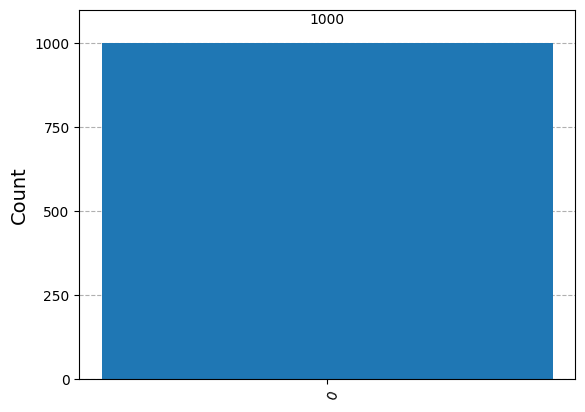

In [ ]:
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

# create a one qubit circuit

#initialize
qc = QuantumCircuit(1)
# apply a Hadamard gate to our qubit
qc.h(0)
# apply a second Hadamard gate to our qubit
qc.h(0)
# measure the qubit
qc.measure_all()

# Classically simulate our quantum circuit using Sampler
# collect 1000 shots from the circuit

result = Sampler().run([qc], shots=1000).result()[0] #note the [0]
co = result.data.meas.get_counts()

plot_histogram(co)

### Draw the circuit

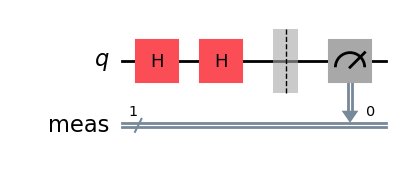

In [ ]:
qc.draw('mpl')

We can also use a different visualization by printing the circuit

In [ ]:
print(qc)

        ┌───┐┌───┐ ░ ┌─┐
     q: ┤ H ├┤ H ├─░─┤M├
        └───┘└───┘ ░ └╥┘
meas: 1/══════════════╩═
                      0 


### A few other one-qubit gates

X or NOT gate

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
Statevector([0.+0.j, 1.+0.j],
            dims=(2,))
Theta:  3.141592653589793
Phi:  0.0


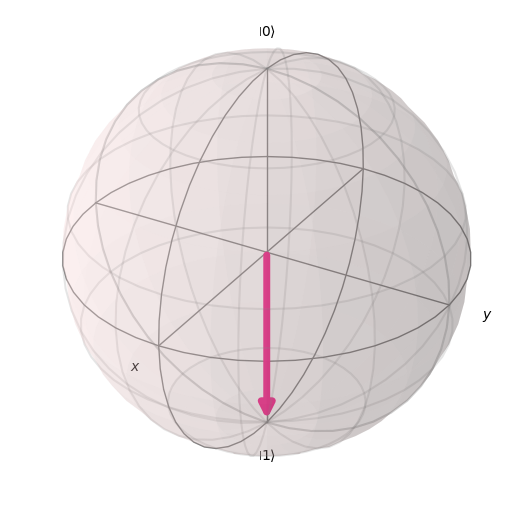

In [ ]:
#initialize
qc = QuantumCircuit(1)

statevector = Statevector(qc)
print(statevector)

# apply a NOT gate, also known as X, to our first qubit
#qc.h(0)
qc.x(0)
#qc.h(0)

statevector = Statevector(qc)
print(statevector)

theta, phi = bloch_angles(statevector.data[0], statevector.data[1])
print("Theta: ", theta)
print("Phi: ", phi)

plot_bloch_vector([1,theta,phi], coord_type="spherical")

## Exercise 3
**Modify the above code to introduce a Hadamard gate before the NOT. Visualize the result on the Bloch sphere. Then further modify the code to add one more Hadamard gate *after* the not gate. Visualize on the Bloch sphere. Does this make sense to you?**

Y gate

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
Statevector([0.+0.j, 0.+1.j],
            dims=(2,))
Theta:  3.141592653589793
Phi:  1.5707963267948966


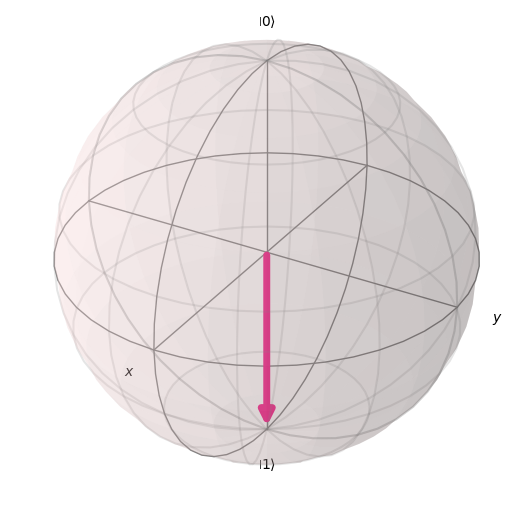

In [14]:
#initialize
qc = QuantumCircuit(1)

statevector = Statevector(qc)
print(statevector)

# apply a Y gate
qc.y(0)

statevector = Statevector(qc)
print(statevector)

theta, phi = bloch_angles(statevector.data[0], statevector.data[1])
print("Theta: ", theta)
print("Phi: ", phi)

plot_bloch_vector([1,theta,phi], coord_type="spherical")

## Exercise 4
**The Bloch sphere representation neglects global phases! Discuss...
(Hint: what is your longitude if you stand exactly at the South Pole?)**

Z gate

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
Theta:  0.0
Phi:  0.0


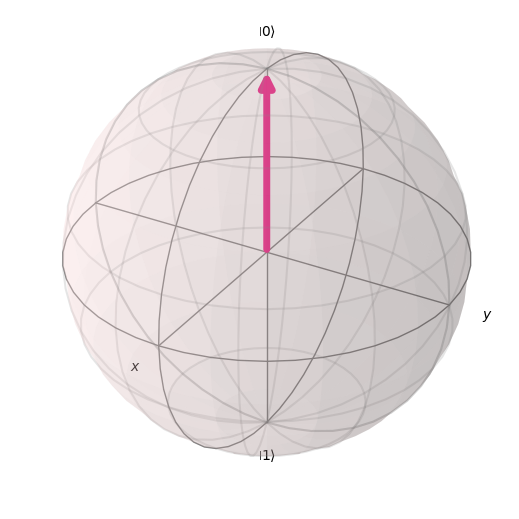

In [ ]:
#initialize
qc = QuantumCircuit(1)

statevector = Statevector(qc)
print(statevector)

# apply a Z gate
qc.z(0)

statevector = Statevector(qc)
print(statevector)

theta, phi = bloch_angles(statevector.data[0], statevector.data[1])
print("Theta: ", theta)
print("Phi: ", phi)

plot_bloch_vector([1,theta,phi], coord_type="spherical")

RZ gate (rotation around the Z axis)




Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
Statevector([6.123234e-17-1.j, 0.000000e+00+0.j],
            dims=(2,))
Theta:  0.0
Phi:  1.5707963267948966


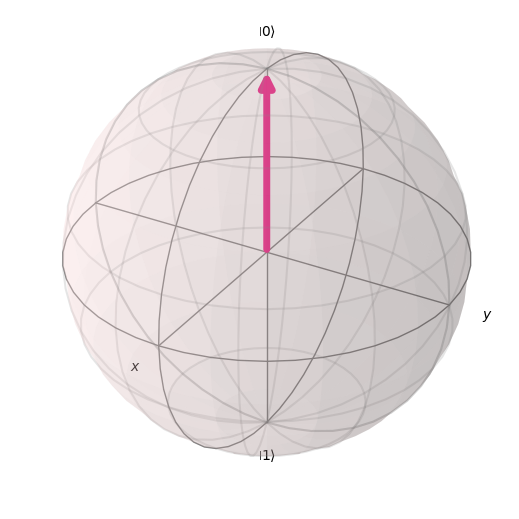

In [ ]:
import numpy as np
#initialize
qc = QuantumCircuit(1)

statevector = Statevector(qc)
print(statevector)

# apply a Z gate
qc.rz(np.pi, 0) # arguments are phase, qubit (always 0 in our case)

statevector = Statevector(qc)
print(statevector)

theta, phi = bloch_angles(statevector.data[0], statevector.data[1])
print("Theta: ", theta)
print("Phi: ", phi)

plot_bloch_vector([1,theta,phi], coord_type="spherical")

Note that RZ(pi) sends us in a state that differs from the one obtained by applying Z. The difference is only a global phase and 6.123234e-17 rather than 0. The latter is a floating point math issue.


In [ ]:
print((0.1+0.2)==0.3)

False


## Exercise 5

**Contemplate the result of the cell above**

Square root of X gate

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
Statevector([0.5+0.5j, 0.5-0.5j],
            dims=(2,))
Theta:  1.5707963267948966
Phi:  -1.5707963267948966


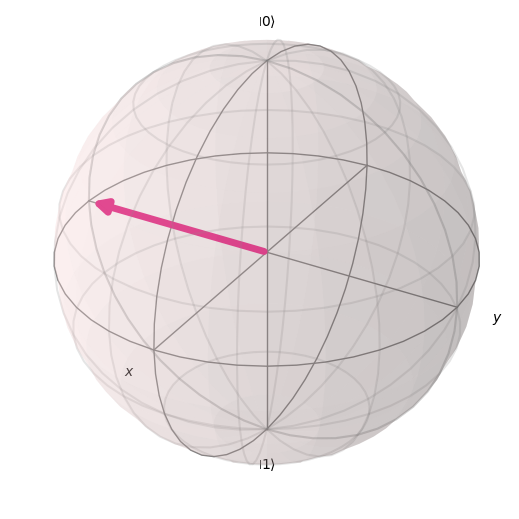

In [20]:
#initialize
qc = QuantumCircuit(1)

statevector = Statevector(qc)
print(statevector)

# apply a sqrt(NOT) gate, also known as sqrt(X), to our first qubit
# qc.h(0)
qc.sx(0)

statevector = Statevector(qc)
print(statevector)

theta, phi = bloch_angles(statevector.data[0], statevector.data[1])
print("Theta: ", theta)
print("Phi: ", phi)

plot_bloch_vector([1,theta,phi], coord_type="spherical")

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))
Theta:  3.141592653589793
Phi:  0.0


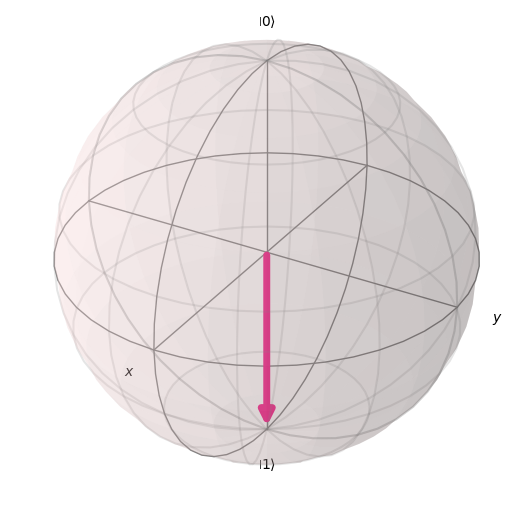

In [18]:
# apply it again
qc.sx(0)

statevector = Statevector(qc)
print(statevector)

theta, phi = bloch_angles(statevector.data[0], statevector.data[1])
print("Theta: ", theta)
print("Phi: ", phi)

plot_bloch_vector([1,theta,phi], coord_type="spherical")

T gate

Statevector([0.70710678+0.j , 0.5       +0.5j],
            dims=(2,))
Theta:  1.5707963267948966
Phi:  0.7853981633974483


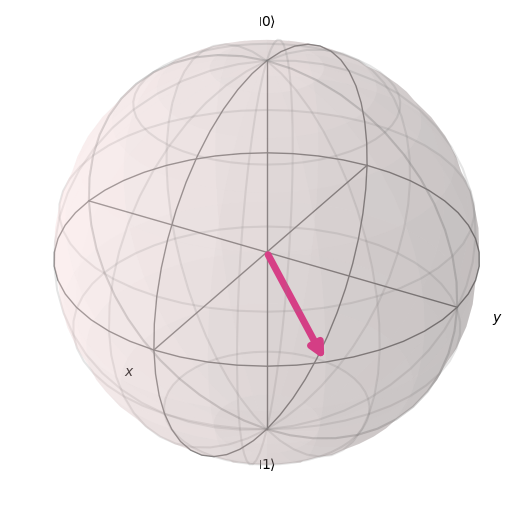

In [16]:
#initialize
qc = QuantumCircuit(1)

qc.h(0) #pre-apply a hadamard just so we see the effect of T
qc.t(0)


statevector = Statevector(qc)
print(statevector)

theta, phi = bloch_angles(statevector.data[0], statevector.data[1])
print("Theta: ", theta)
print("Phi: ", phi)

plot_bloch_vector([1,theta,phi], coord_type="spherical")

## Exercise 6

**Spend some time playing with the gates we introduced and possibly other single qubit gates, visualize and *understand* the results on the Bloch sphere**

### Unitary gate
This gate implements a generic unitary transformation by explicitly specifying a matrix.

Statevector([0.99500417+0.j, 0.09983342+0.j],
            dims=(2,))
Theta:  0.1999999999999989
Phi:  0.0


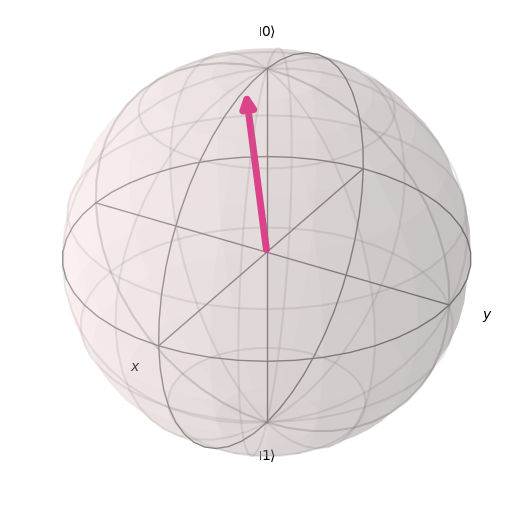

In [ ]:
#initialize
qc = QuantumCircuit(1)
epsilon = 0.2
matrix = np.array([[np.cos(epsilon / 2), -np.sin(epsilon / 2)],
                   [np.sin(epsilon / 2), np.cos(epsilon / 2)]])
qc.unitary(matrix, 0)

statevector = Statevector(qc)
print(statevector)

theta, phi = bloch_angles(statevector.data[0], statevector.data[1])
print("Theta: ", theta)
print("Phi: ", phi)

plot_bloch_vector([1,theta,phi], coord_type="spherical")

### Saving circuits to file

You can save your quantum circuit to a file. This allows you to transfer it to others, to reopen it later, etc.

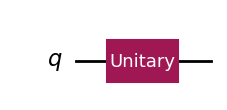

In [ ]:
from qiskit import qpy

with open('test.qpy', 'wb') as file:
    qpy.dump(qc, file)

# do something else, go eat a sandwich

with open('test.qpy', 'rb') as handle:
    pippo = qpy.load(handle)

pippo[0].draw('mpl') #note that we read a list of circuits, hence the [0]

In [ ]:
!file test.qpy

test.qpy: data


## Exercise 7

**Save a circuit to file, reread it. Take a look at the file on your file system.**

### Gates acting on more than one qubit

Controlled not gate

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


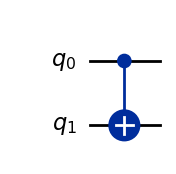

In [ ]:
# create a circuit with two qubits
qc2 = QuantumCircuit(2)

# take a look at the state vector before the cnot
statevector = Statevector(qc2)
print(statevector)

qc2.cx(0, 1)

# take a look at the state vector after the cnot
statevector = Statevector(qc2)
print(statevector)

qc2.draw("mpl")

The meaning of the state vector now should be clear. The four complex amplitudes do **not** represent the state of the two qubits taken separately! The four complex numbers listed as the state vector are instead the amplitudes associated to $\ket{00}$, $\ket{01}$, $\ket{10}$, $\ket{11}$ respectively. We can call this basis of states also $\ket{\mathbf{0}}$, $\ket{\mathbf{1}}$, $\ket{\mathbf{2}}$, $\ket{\mathbf{3}}$: this is the decimal representation of the relevant binary numbers.

## Exercise 8
**Make a circuit with three qubits and print its state vector.**

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


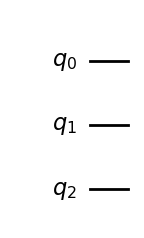

In [21]:
# create a circuit with two qubits
qc3 = QuantumCircuit(3)

# take a look at the state vector
statevector = Statevector(qc3)
print(statevector)

qc3.draw("mpl")

As you can see the state is represented by **eight** complex numbers, **not six**. The eight amplitudes are associated to $\ket{000}$, $\ket{001}$, $\ket{010}$, $\ket{011}$, $\ket{100}$, $\ket{101}$, $\ket{110}$, $\ket{111}$ respectively.

### Two entangled qubits

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


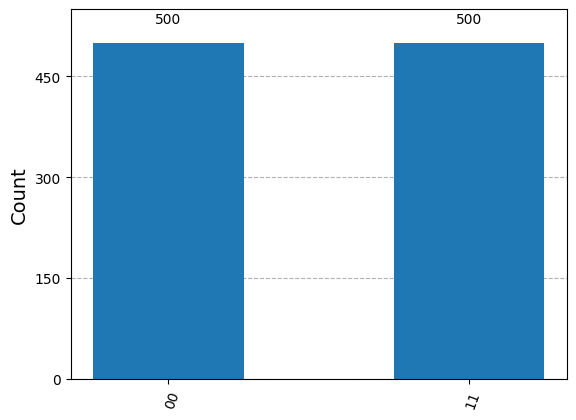

In [22]:
#from qiskit.primitives import StatevectorSampler as Sampler
#from qiskit import QuantumCircuit
#from qiskit.visualization import plot_histogram

# create a Bell circuit
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)

# take a look at the state vector
statevector = Statevector(bell)
print(statevector)

bell.measure_all()

# initialization of the sampler
sampler = Sampler()

# collect 1000 shots from the Bell circuit
job = sampler.run([bell], shots=1000)
job_result = job.result()
result = job.result()[0]
co = result.data.meas.get_counts()

plot_histogram(co)

Note how the output is either $\ket{00}$ or $\ket{11}$. You cannot express this by saying what is the state of the first qubit and what is the state of the second qubit separately. The first qubit was prepared in superposition between $\ket{0}$ and $\ket{1}$, and the *cnot* gate puts the second qubit in superposition as well but in a way that depends on the other qubit.

Let's show this by writing a state of a two qubit system that **can** be expressed as the product of the states of each qubit taken independently.

$$
(a\ket{0} + b\ket{1})(c\ket{0} + d\ket{1}) = ac \ket{00} + ad\ket{01} + bc\ket{10} + bd\ket{11}
$$

note that the product of the coefficients of $\ket{00}$ and $\ket{11}$ coincides with the product of the coefficents of $\ket{01}$ and $\ket{10}$.

But in the entangled state produced by our Bell circuit the coefficient of $\ket{00}$ is $1/\sqrt{2}$ and that of $\ket{11}$ is also $1/\sqrt{2}$, while the other two are $0$. Since $\frac{1}{2} \neq 0$ this state cannot be represented as the product of two independent single qubit states.

Let's visualize the circuit.

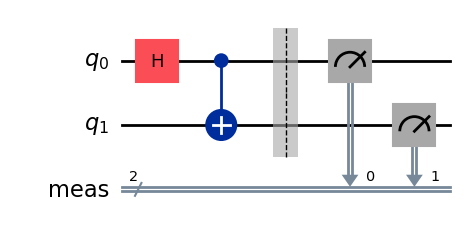

In [ ]:
bell.draw('mpl')

### Swap gate

This gate swaps two qubits. The meaning of this is clear if the two qubits are not entangled, that is if we are looking at a state that can be factored out into the product of the states of two qubits considered independently.

## Exercise 9
**Make a circuit with two qubits and a swap gate. Prepare the two qubits in two different states initially, look at the final state, understand.**

**The swap gate is implemented by the method *swap(qubit1, qubit2)* of QuantumCircuit.**

Statevector([0.        +0.j, 0.        +0.j, 0.70710678+0.j,
             0.70710678+0.j],
            dims=(2, 2))
Statevector([0.        +0.j, 0.70710678+0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


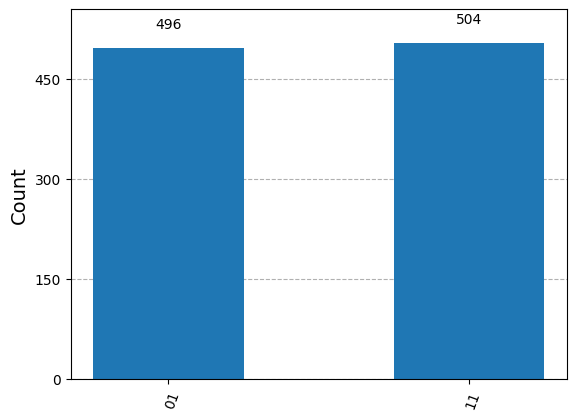

In [25]:
# create a two qubit circuit
qc2 = QuantumCircuit(2)
qc2.h(0) #Apply Hadamard to the first qubit
qc2.x(1) #negate the second qubit

# take a look at the state vector
statevector = Statevector(qc2)
print(statevector)

qc2.swap(0,1)

# take a look at the state vector
statevector = Statevector(qc2)
print(statevector)

qc2.measure_all()

# initialization of the sampler
sampler = Sampler()

# collect 1000 shots from the circuit
job = sampler.run([qc2], shots=1000)
job_result = job.result()
result = job.result()[0]
co = result.data.meas.get_counts()

plot_histogram(co)

## Exercise 10
**Is this an entangled state? Show that given the amplitudes of the states $\ket{00}$, $\ket{01}$, $\ket{10}$, and $\ket{11}$ the final state can be written as the product of two individual qubit states as**

$$
(a\ket{0} + b\ket{1})(c\ket{0} + d\ket{1}) = ac \ket{00} + ad\ket{01} + bc\ket{10} + bd\ket{11}
$$

Of course we can apply the swap gate also when two qubits are entangled. The action of the gate is entirely defined by how it behaves on the basis states $\ket{00}$, $\ket{01}$, $\ket{10}$, and $\ket{11}$ and, since any state (even entangled ones) can be represented as a linear combination of these states, we know how it will act on any state. This is a way to extend the meaning of the concept *swap* where it was not previously defined.

## Exercise 11
**Consider the bell circuit once again. Apply a swap gate at the end of it. What happens? Apply instead a swap gate in-between the Hadamard and the cnot. What happens? Is the final state still entangled? What happens if after swapping you reverse the direction of the cnot by writing bell.cx(1,0)?**

In [30]:
bell = QuantumCircuit(2)
bell.h(0)
bell.swap(0, 1)
bell.cx(0, 1) #bell.cx(1, 0)
#bell.swap(0, 1)


# take a look at the state vector
statevector = Statevector(bell)
print(statevector)

Statevector([0.70710678+0.j, 0.        +0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))


1. The first one does nothin
2. 

### Synthetizing a swap gate
A swap gate can be built using three controlled not gates. Don't believe me? Just watch.

Statevector([0.        +0.j, 0.        +0.j, 0.70710678+0.j,
             0.70710678+0.j],
            dims=(2, 2))
Statevector([0.        +0.j, 0.70710678+0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


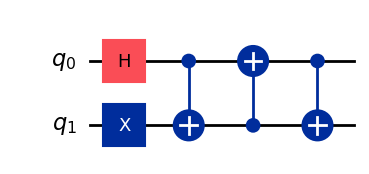

In [ ]:
# create a two qubit circuit
qc2 = QuantumCircuit(2)
qc2.h(0) #Apply Hadamard to the first qubit
qc2.x(1) #negate the second qubit

statevector = Statevector(qc2)
print(statevector)

qc2.cx(0,1)
qc2.cx(1,0)
qc2.cx(0,1)

#statevector = Statevector(qc2)
#print(statevector)

#qc2.swap(0,1)

statevector = Statevector(qc2)
print(statevector)

qc2.draw('mpl')

## Exercise 12
**How can we check whether our swap gate worked?**

### Swap test

This allows us to non-destructively test whether two qubits are in the same state or not. The state of the first qubit (actually the least significant one) is initially |0>. At the end is should still be |0> if the two qubits to be tested are identical. So in the histogram I expect to see results like $000$, $100$, $110$ and $010$ only. If the two qubits are almost identical but not quite, then we will get some numbers ending in $1$, like $001$ or $101$, etc.

{'010': 250, '011': 253, '100': 252, '101': 245}


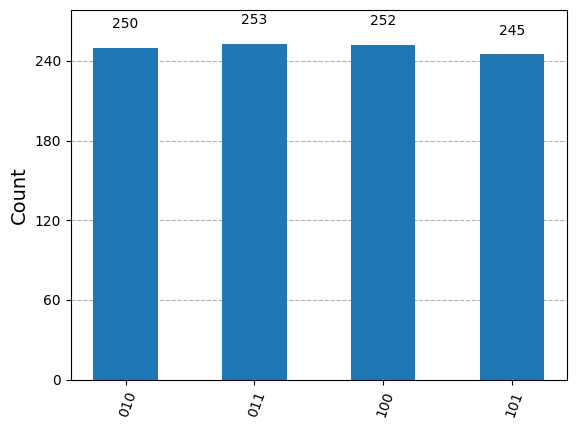

In [58]:
# create a Bell circuit
st = QuantumCircuit(3)
# prepare the two qubits to be tested so that they are almost in the same state
# by applying a unitary transform (a rotation by angle epsilon) to the second
# qubit, while leaving the first qubit untouched in state |0>
epsilon = np.pi 
matrix = np.array([[np.cos(epsilon / 2), -np.sin(epsilon / 2)],
                   [np.sin(epsilon / 2), np.cos(epsilon / 2)]])
st.unitary(matrix, [1,])

# swap test
st.h(0)
st.cswap(0,1,2) #controlled swap; qubit 0 is the control qubit
st.h(0)

st.measure_all()

# initialization of the sampler
sampler = Sampler()

# collect 1000 shots from the swap test circuit
job = sampler.run([st], shots=1000)
job_result = job.result()
result = job.result()[0]
co = result.data.meas.get_counts()

print(co)
plot_histogram(co)

Let's draw the circuit

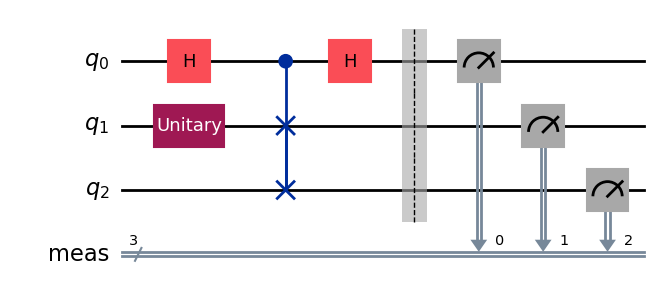

In [ ]:
st.draw('mpl')

## Exercise 13

**How does the swap test work?**

[1000, 998, 988, 978, 957, 932, 920, 858, 859, 786, 778, 707, 678, 634, 584, 539, 506, 460, 370, 333, 290, 268, 220, 154, 126, 83, 66, 40, 28, 14, 7, 1, 0, 7, 18, 34, 61, 79, 87, 136, 165, 194, 258, 287, 332, 397, 424, 491, 535, 588, 646, 682, 759, 764, 835, 840, 890, 907, 935, 963, 983, 993, 1000]


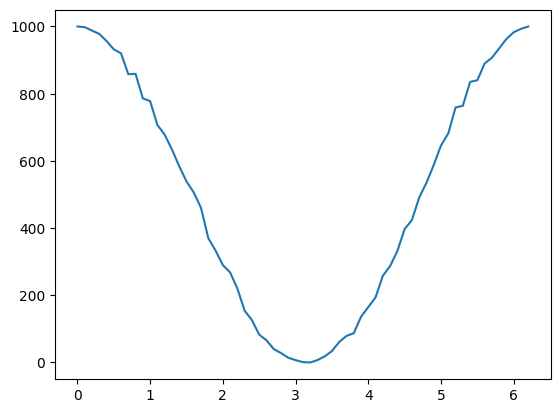

In [59]:
results = []

# create a range from pi to 2pi with steps of 0.1
rangePI = np.arange(0, 2*np.pi, 0.1)

for i in rangePI:
    st = QuantumCircuit(3)
    
    epsilon = i
    matrix = np.array([[np.cos(epsilon / 2), -np.sin(epsilon / 2)],
                       [np.sin(epsilon / 2), np.cos(epsilon / 2)]])
    st.unitary(matrix, [1,])
    
    # swap test
    st.h(0)
    st.cswap(0,1,2) #controlled swap; qubit 0 is the control qubit
    st.h(0)
    
    st.measure_all()

    # initialization of the sampler
    sampler = Sampler()
    
    # collect 1000 shots from the swap test circuit
    job = sampler.run([st], shots=1000)
    job_result = job.result()
    result = job.result()[0]
    co = result.data.meas.get_counts()
    
    
    if '000' in co:
        results.append(co['000'])
    else:
        results.append(0)

print(results)

import matplotlib.pyplot as plt
plt.plot(rangePI, results)
plt.show()

### On to some real problem: Bernstein-Vazirani